<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data (convert labels to {-1, +1})
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.8, random_state=42)
y = 2 * y - 1  # Labels: {-1, +1}

In [ ]:
y

array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1])

In [ ]:
data = pd.DataFrame(x1=X[:,0],x2 = y)

array([[-3.37171125,  8.68009997],
       [ 6.58937107,  3.87001338],
       [-3.48908653,  9.21394679],
       [ 6.11958712,  5.38739705],
       [ 5.04930672,  4.32602664],
       [-1.85868553, 11.78275195],
       [ 5.13792228,  3.46209953],
       [ 1.84868466,  2.09658304],
       [-3.2149923 ,  6.37995922],
       [-4.01978916,  8.45770385],
       [-2.38764685,  6.44973939],
       [ 2.41336756, -0.40365222],
       [-3.35425152,  9.99089421],
       [-4.89993251,  9.36863635],
       [ 3.41583434,  2.39122634],
       [ 3.23002291,  1.39345895],
       [ 4.74829321,  6.40700549],
       [ 2.71227234,  2.84162003],
       [ 4.74465453, -0.08417685],
       [-2.34402823,  5.43666208],
       [ 5.02524758, -0.26916012],
       [ 4.2936291 ,  2.5159549 ],
       [ 6.06373634,  0.33627227],
       [ 6.37395587,  2.71617535],
       [ 5.10766787,  3.38045085],
       [ 0.33338544, 10.39566864],
       [ 4.50109576,  2.58724324],
       [-1.04665114, 11.45551818],
       [ 5.57937365,

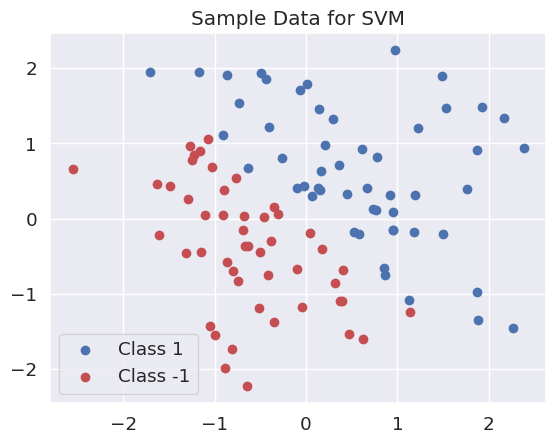

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Plot the data
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label='Class 1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', label='Class -1')
plt.legend()
plt.title('Sample Data for SVM')
plt.show()

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame({'x1':[0,1,2,2,3],'x2':[0,1,3,0,4],'r':['A','A','B','A','B']})

In [ ]:
data.head()

,x1,x2,r
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


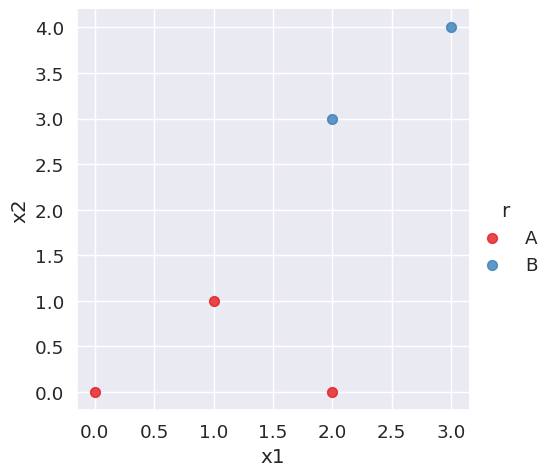

In [ ]:
sns.lmplot(x='x1', y='x2', data=data1, fit_reg=False, hue='r', palette='Set1', scatter_kws={'s':50})
plt.show()

In [ ]:
from sklearn import svm

#---Converting the columns as Matrics---#
points = data[['x1','x2']].values
result = data['r']

clf = svm.SVC(kernel='linear')
clf.fit(points,result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
 np.abs(clf.dual_coef_))


Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


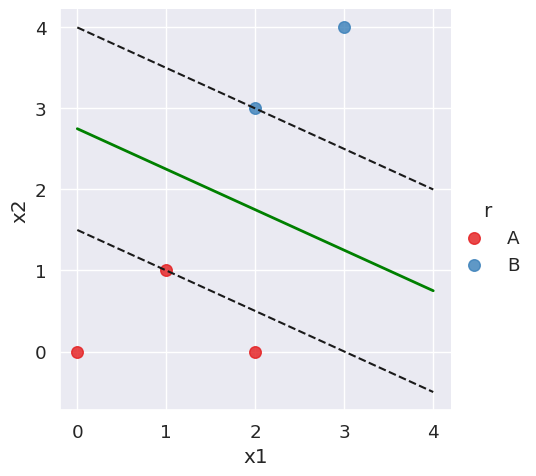

In [ ]:
#---w is the vector of weights---
w = clf.coef_[0]
#---find the slope of the hyperplane---
slope = -w[0] / w[1]
b = clf.intercept_[0]
#---find the coordinates for the hyperplane---
xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])
#---plot the margins---
s = clf.support_vectors_[0] #---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])
s = clf.support_vectors_[-1] #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])
#---plot the points---
sns.lmplot(x = 'x1', y = 'x2', data=data, hue='r', palette='Set1',
fit_reg=False, scatter_kws={"s": 70})
#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');
#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()

In [ ]:
print(clf.predict([[3,3]])[0]) # 'B'
print(clf.predict([[4,0]])[0]) # 'A'
print(clf.predict([[2,2]])[0]) # 'B'
print(clf.predict([[1,2]])[0]) # 'A'

B
A
B
A


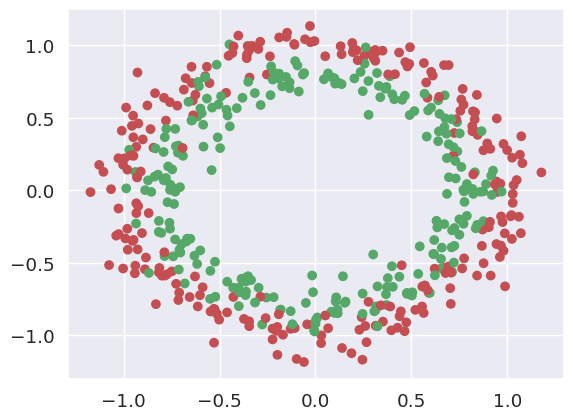

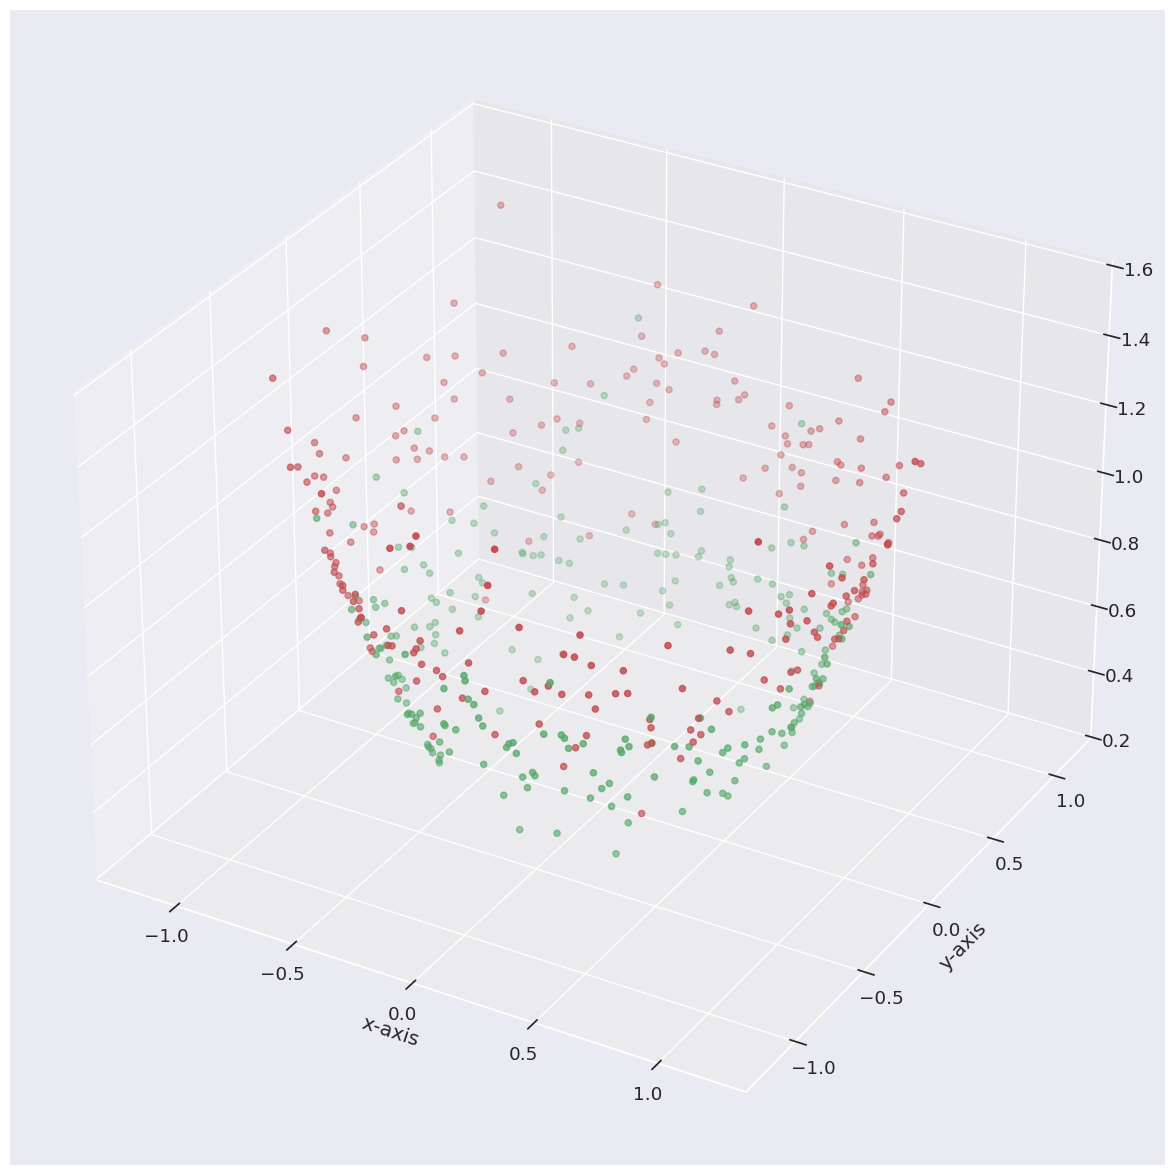

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [ ]:
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)

SVC(kernel='linear')

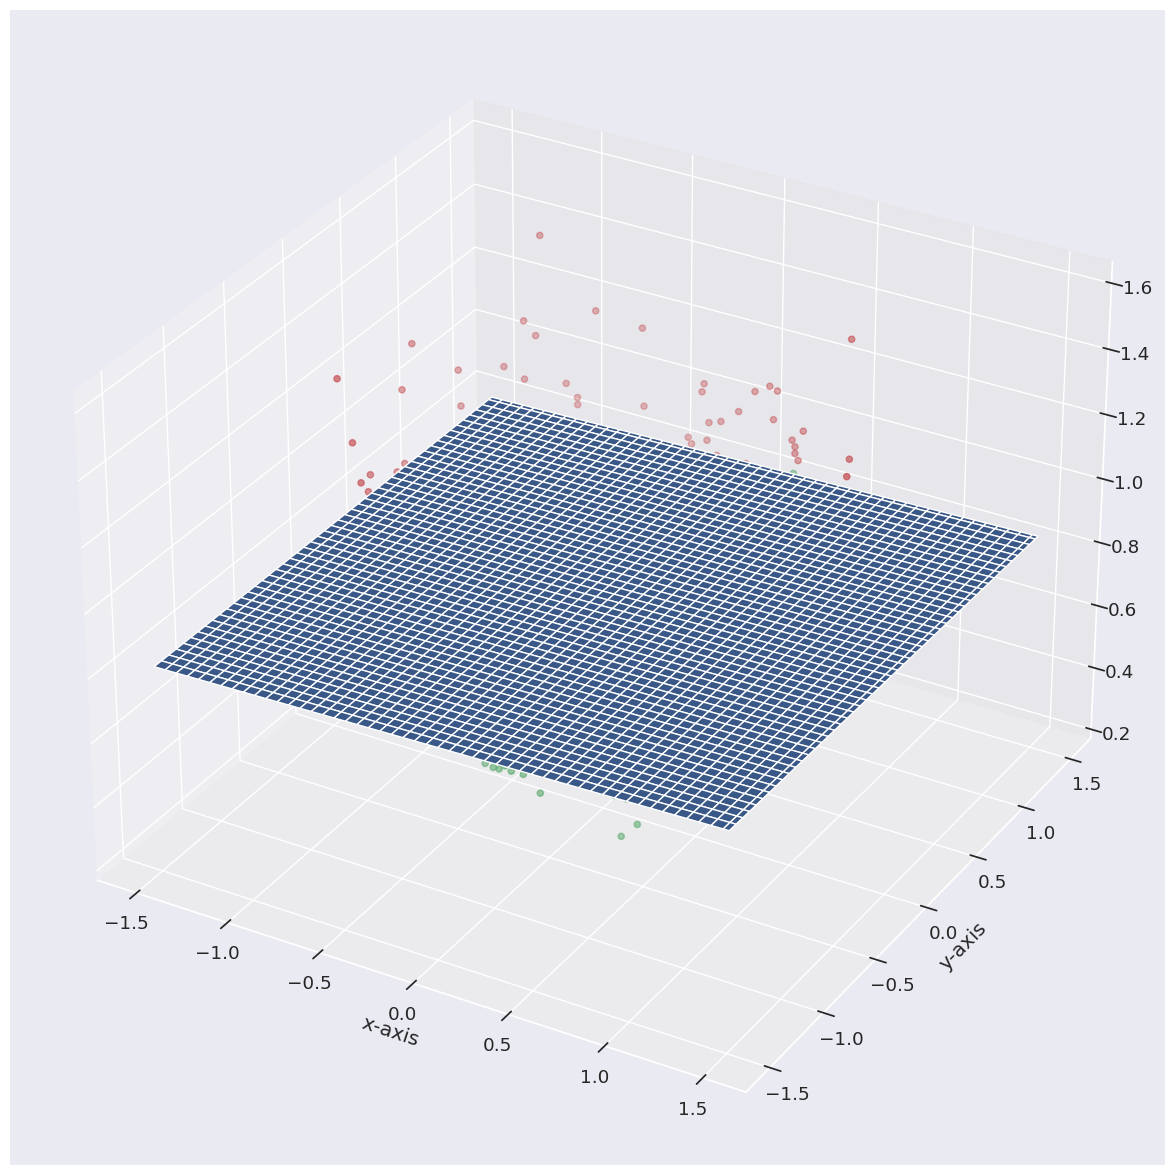

In [ ]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) /clf.coef_[0][2]

tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2
rgb = np.array(['r', 'g'])
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]
 * y) / clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()

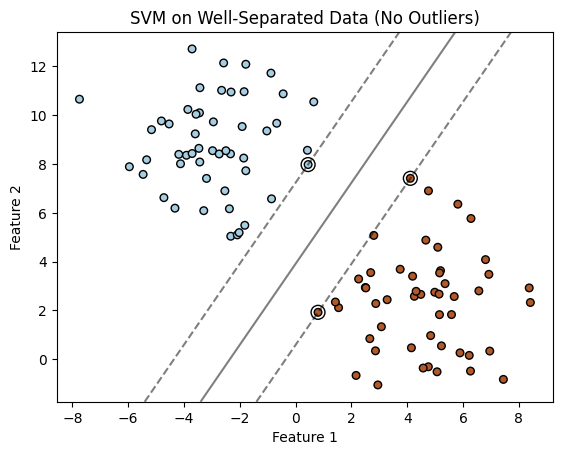

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate well-separated data
X_clean, y_clean = make_blobs(
    n_samples=100,
    centers=2,
    cluster_std=2,  # Low std = tight clusters
    random_state=42
)

# Train SVM
clf = SVC(kernel='linear', C=1000)
clf.fit(X_clean, y_clean)

# Plot function (reusable for both cases)
def plot_svm(X, y, model, title, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
    ax = plt.gca()

    # Decision boundary and margins
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100, facecolors='none', edgecolors='k', linewidths=1
    )
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot clean data
plot_svm(
    X_clean, y_clean, clf,
    "SVM on Well-Separated Data (No Outliers)",
    "svm_clean.png"
)

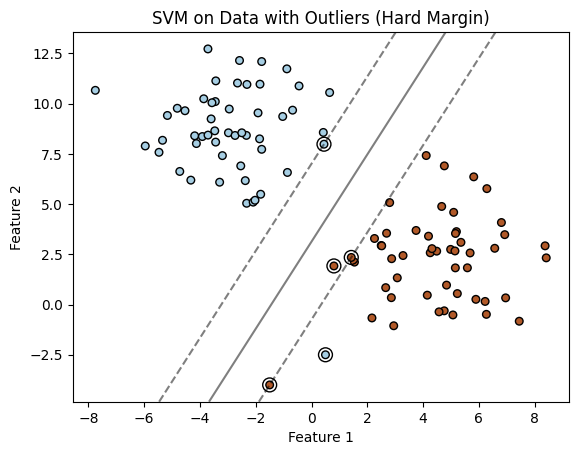

In [ ]:
# Add outliers (mislabeled points near the boundary)
np.random.seed(42)
outliers = np.array([
    [0.5, -2.5],  # Class 0 but near class 1
    [-1.5, -4.0]   # Class 1 but near class 0
])
X_outliers = np.vstack([X_clean, outliers])
y_outliers = np.append(y_clean, [0, 1])  # Opposite labels!

# Re-train SVM
clf_outliers = SVC(kernel='linear', C=1000)  # High C = hard margin
clf_outliers.fit(X_outliers, y_outliers)

# Plot data with outliers
plot_svm(
    X_outliers, y_outliers, clf_outliers,
    "SVM on Data with Outliers (Hard Margin)",
    "svm_outliers_hard.png"
)

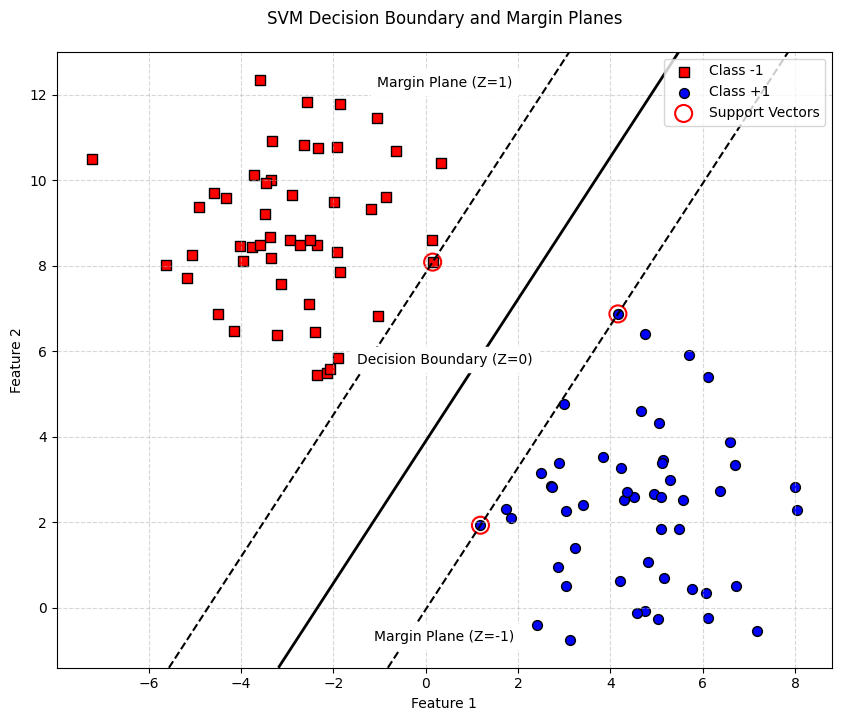

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data (convert labels to {-1, +1})
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.8, random_state=42)
y = 2 * y - 1  # Labels: {-1, +1}

# Train SVM
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot decision boundary and margins
def plot_svm_with_planes(X, y, model, title, filename):
    plt.figure(figsize=(10, 8))

    # Scatter plot with custom markers
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='s', s=50, label='Class -1', edgecolor='k', facecolor='red')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', s=50, label='Class +1', edgecolor='k', facecolor='blue')

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='red', linewidths=1.5, label='Support Vectors')

    # Create grid for decision and margin planes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary (Z=0) and margins (Z=-1, Z=1)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'], linewidths=[1.5, 2, 1.5])

    # Annotate planes
    ax.text(0.5, 0.95, "Margin Plane (Z=1)", transform=ax.transAxes, ha='center', va='center', backgroundcolor='white')
    ax.text(0.5, 0.05, "Margin Plane (Z=-1)", transform=ax.transAxes, ha='center', va='center', backgroundcolor='white')
    ax.text(0.5, 0.5, "Decision Boundary (Z=0)", transform=ax.transAxes, ha='center', va='center', backgroundcolor='white')

    plt.title(title, pad=20)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Generate the plot
plot_svm_with_planes(
    X, y, clf,
    "SVM Decision Boundary and Margin Planes",
    "svm_decision_planes.png"
)

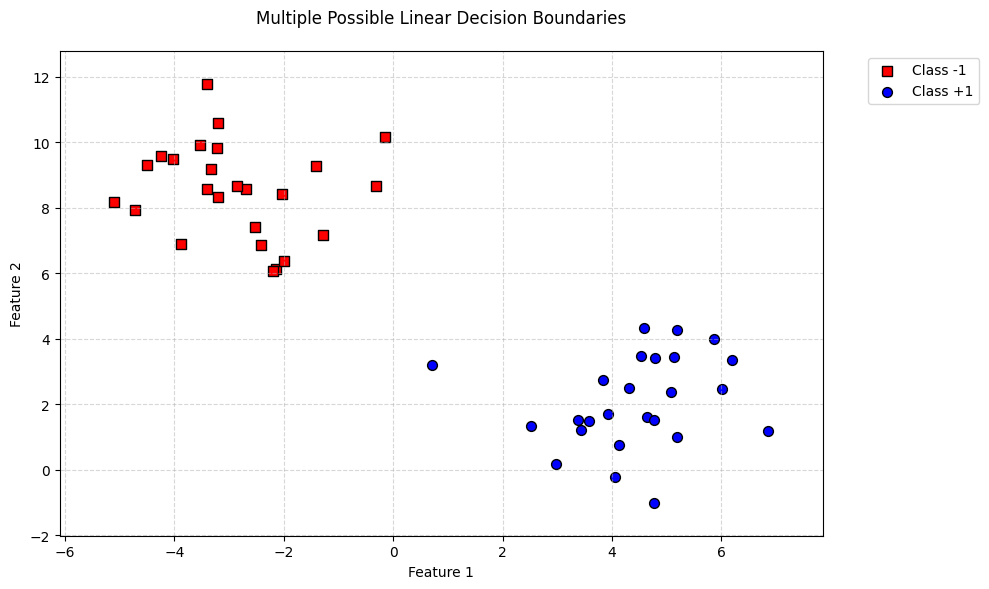

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate linearly separable data
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1.5, random_state=42)
y = 2 * y - 1  # Convert labels to {-1, +1}

# Plot data with custom markers
plt.figure(figsize=(10, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='s', s=50, label='Class -1', edgecolor='k', facecolor='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', s=50, label='Class +1', edgecolor='k', facecolor='blue')

# Generate random lines and plot valid separators
np.random.seed(42)
num_lines = 10  # Number of random lines to test
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

for _ in range(num_lines):
    # Random slope (m) and intercept (b)
    m = np.random.uniform(-5, 5)
    b = np.random.uniform(-10, 10)

    # Check if the line separates the classes
    predictions = np.sign(X[:, 1] - (m * X[:, 0] + b))
    if np.all(predictions == y):
        plt.plot(x_vals, m * x_vals + b, linestyle='--', alpha=0.7, label=f'Line: y = {m:.1f}x + {b:.1f}')

plt.title("Multiple Possible Linear Decision Boundaries", pad=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.tight_layout()
plt.savefig("multiple_decision_boundaries.png", dpi=300, bbox_inches='tight')
plt.show()